<a href="https://colab.research.google.com/github/sampadagawde/SUBSCRIPTION-BOX-CHURN-PREDICTOR/blob/main/SUBSCRIPTION_BOX_CHURN_PREDICTOR%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 SUBSCRIPTION BOX CHURN PREDICTOR
✅ Dataset loaded: (20, 11)
   Churn Rate: 40.0%


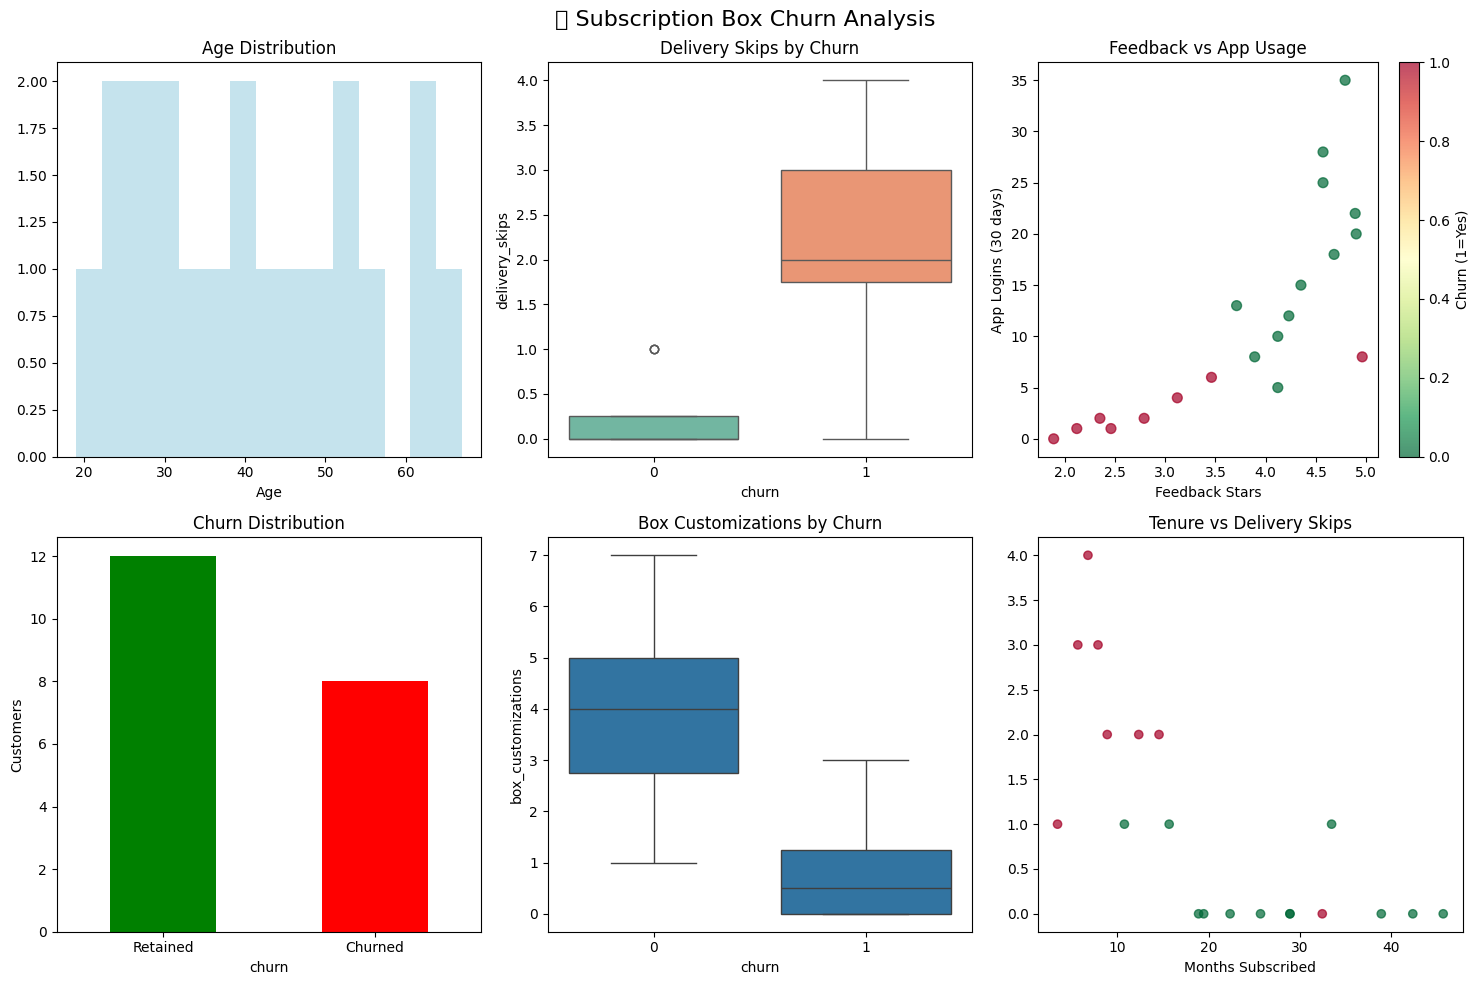


🤖 TRAINING MODELS...

📊 MODEL RESULTS:
Logistic: 0.750
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Random Forest: 0.500
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



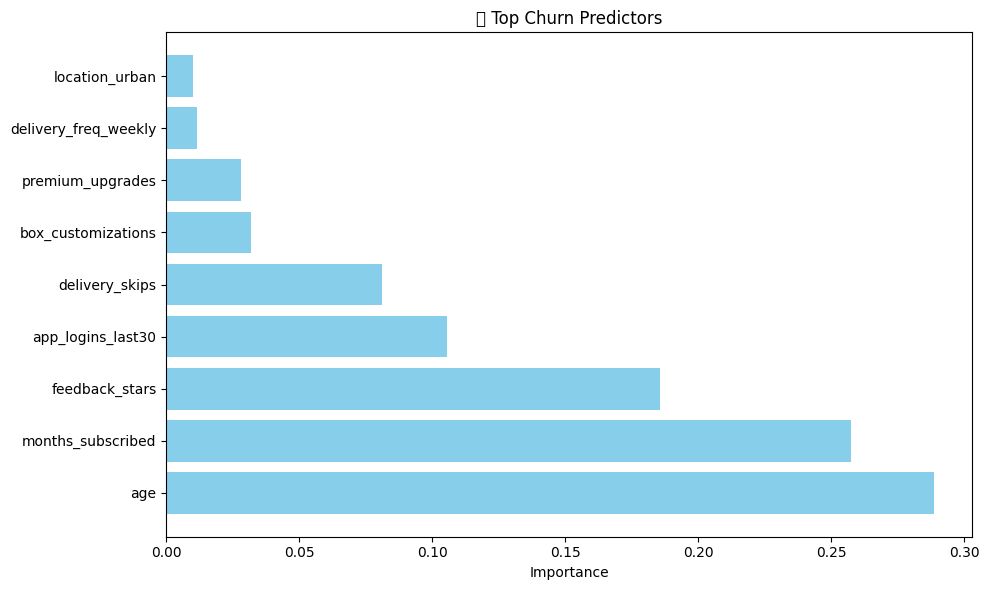


🔥 TOP PREDICTORS:
             Feature  Importance
0                age    0.288408
7  months_subscribed    0.257389
4     feedback_stars    0.185492
5  app_logins_last30    0.105694
6     delivery_skips    0.081097

🎉 PROJECT COMPLETE!


In [ ]:
# PROJECT.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

print("🚀 SUBSCRIPTION BOX CHURN PREDICTOR")
print("="*50)

# LOAD YOUR CSV (paste the CSV content above first)
df = pd.read_csv('subscription_box_churn.csv')
print(f"✅ Dataset loaded: {df.shape}")
print(f"   Churn Rate: {df['churn'].mean():.1%}")

# EDA VISUALIZATIONS
plt.figure(figsize=(15, 10))
plt.suptitle('🛍️ Subscription Box Churn Analysis', fontsize=16)

plt.subplot(2,3,1)
plt.hist(df['age'], bins=15, alpha=0.7, color='lightblue')
plt.title('Age Distribution')
plt.xlabel('Age')

plt.subplot(2,3,2)
sns.boxplot(data=df, x='churn', y='delivery_skips', palette='Set2')
plt.title('Delivery Skips by Churn')

plt.subplot(2,3,3)
scatter = plt.scatter(df['feedback_stars'], df['app_logins_last30'],
                     c=df['churn'], cmap='RdYlGn_r', alpha=0.7, s=50)
plt.title('Feedback vs App Usage')
plt.xlabel('Feedback Stars')
plt.ylabel('App Logins (30 days)')
plt.colorbar(scatter, label='Churn (1=Yes)')

plt.subplot(2,3,4)
df['churn'].value_counts().plot(kind='bar', color=['green','red'])
plt.title('Churn Distribution')
plt.ylabel('Customers')
plt.xticks([0,1], ['Retained','Churned'], rotation=0)

plt.subplot(2,3,5)
sns.boxplot(data=df, x='churn', y='box_customizations')
plt.title('Box Customizations by Churn')

plt.subplot(2,3,6)
plt.scatter(df['months_subscribed'], df['delivery_skips'],
           c=df['churn'], cmap='RdYlGn_r', alpha=0.7)
plt.title('Tenure vs Delivery Skips')
plt.xlabel('Months Subscribed')

plt.tight_layout()
plt.savefig('churn_eda.png', dpi=300, bbox_inches='tight')
plt.show()

# TRAIN MODELS
features = ['age', 'location_urban', 'delivery_freq_weekly', 'box_customizations',
           'feedback_stars', 'app_logins_last30', 'delivery_skips',
           'months_subscribed', 'premium_upgrades']

X = df[features]
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n🤖 TRAINING MODELS...")
lr = LogisticRegression(random_state=42, max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# RESULTS
print("\n📊 MODEL RESULTS:")
for name, model in [('Logistic', lr), ('Random Forest', rf)]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.3f}")
    print(classification_report(y_test, y_pred))

# FEATURE IMPORTANCE
importances = rf.feature_importances_
imp_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(imp_df['Feature'], imp_df['Importance'], color='skyblue')
plt.title('🏆 Top Churn Predictors')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

print("\n🔥 TOP PREDICTORS:")
print(imp_df.head())

print("\n🎉 PROJECT COMPLETE!")